In [2]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Загружаем файл HR.csv в pandas dataframe**

In [3]:
hr = pd.read_csv("HR.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info() 
hr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**Рассчитываем основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)**

In [16]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
print("Значение моды satisfaction_level: ", hr["satisfaction_level"].mode()[0])
print("Значение моды last_evaluation: ", hr["last_evaluation"].mode()[0])
print("Значение моды number_project: ", hr["number_project"].mode()[0])
print("Значение моды average_montly_hours: ", hr["average_montly_hours"].mode()[0])
print("Значение моды time_spend_company: ", hr["time_spend_company"].mode()[0])
print("Значение моды Work_accident: ", hr["Work_accident"].mode()[0])
print("Значение моды left: ", hr["left"].mode()[0])
print("Значение моды promotion_last_5years: ", hr["promotion_last_5years"].mode()[0])
print("Значение моды department: ", hr["department"].mode()[0])
print("Значение моды salary: ", hr["salary"].mode()[0])

Значение моды satisfaction_level:  0.1
Значение моды last_evaluation:  0.55
Значение моды number_project:  4
Значение моды average_montly_hours:  135
Значение моды time_spend_company:  3
Значение моды Work_accident:  0
Значение моды left:  0
Значение моды promotion_last_5years:  0
Значение моды department:  sales
Значение моды salary:  low


In [24]:
print("Значение медианы satisfaction_level: ", hr["satisfaction_level"].median())
print("Значение медианы last_evaluation: ", hr["last_evaluation"].median())
print("Значение медианы number_project: ", hr["number_project"].median())
print("Значение медианы average_montly_hours: ", hr["average_montly_hours"].median())
print("Значение медианы time_spend_company: ", hr["time_spend_company"].median())
print("Значение медианы Work_accident: ", hr["Work_accident"].median())
print("Значение медианы left: ", hr["left"].median())
print("Значение медианы promotion_last_5years: ", hr["promotion_last_5years"].median())

Значение медианы satisfaction_level:  0.64
Значение медианы last_evaluation:  0.72
Значение медианы number_project:  4.0
Значение медианы average_montly_hours:  200.0
Значение медианы time_spend_company:  3.0
Значение медианы Work_accident:  0.0
Значение медианы left:  0.0
Значение медианы promotion_last_5years:  0.0


**Рассчитываем и визуализируем корреляционную матрицу для количественных переменных. Определяе две самые скоррелированные и две наименее скоррелированные переменные**

In [52]:
hr_cor = hr.drop(["department", "salary"], axis = 1) 
hr_cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [53]:
hr_cor.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

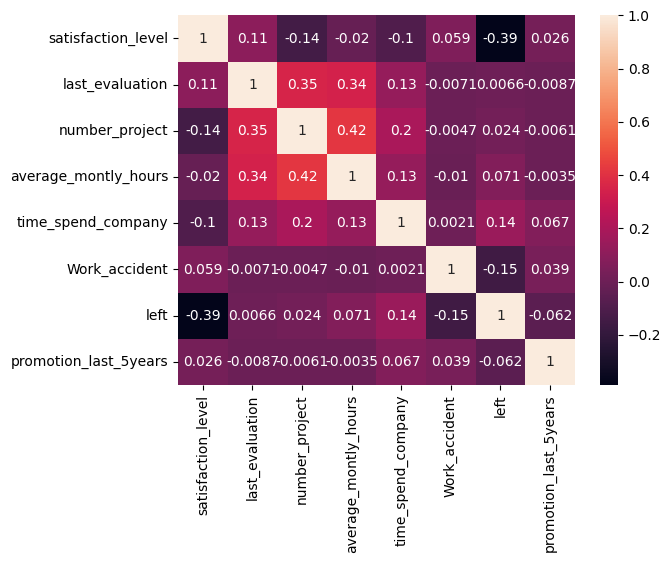

In [54]:
sns.heatmap(hr_cor.corr(), annot = True)

Исходя из тепловой карты, мы видим, что две самые скоррелированные переменные это количество выполненных проектов и среднее количество часов на рабочем месте. Две наименее скоррелированные переменные это уровень удовлетворенности работой и уволился ли сотрудник.

<Axes: xlabel='number_project', ylabel='average_montly_hours'>

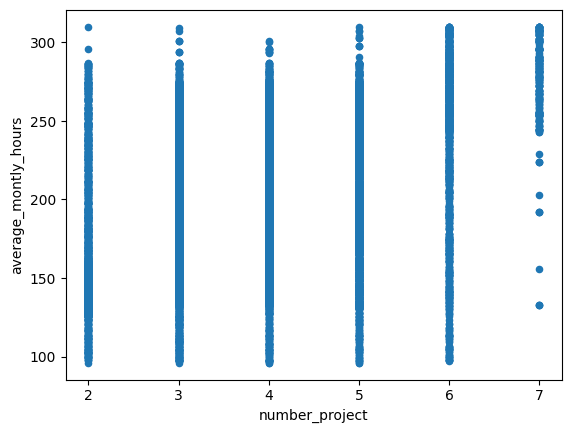

In [61]:
hr.plot(kind = "scatter", x = "number_project", y = "average_montly_hours")

<Axes: xlabel='left', ylabel='satisfaction_level'>

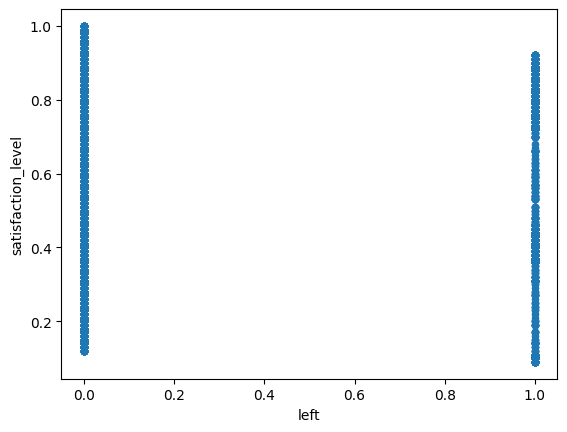

In [64]:
hr.plot(kind = "scatter", x = "left", y = "satisfaction_level")

**Рассчитываем сколько сотрудников работает в каждом департаменте**

In [76]:
employee = hr.groupby(hr["department"]).count()
employee.filter(items=['satisfaction_level']).sort_values('satisfaction_level', ascending=False)

,satisfaction_level
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


**Показываем распределение сотрудников по зарплатам**

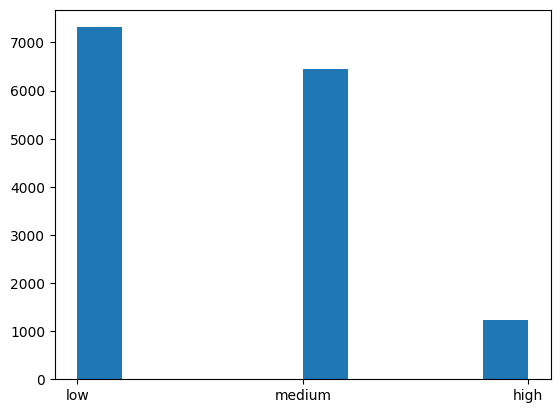

In [79]:
plt.hist(hr["salary"])
plt.show()

**Распределение сотрудников по зарплатам**

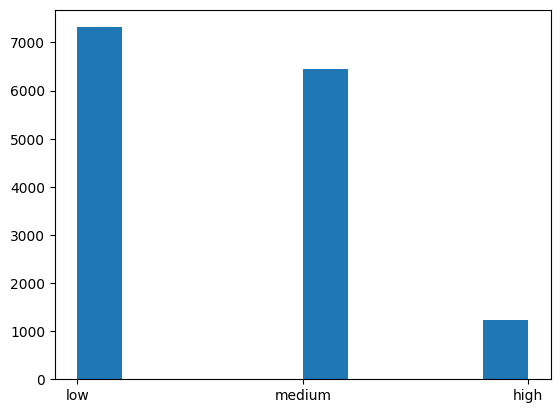

In [4]:
plt.hist(hr["salary"])
plt.show()

**Распределение сотрудников по зарплатам в каждом департаменте по отдельности**

In [25]:
hr_emp = hr.groupby([hr["department"],hr["salary"]])[["salary"]].count()
hr_emp

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

<Axes: ylabel='department,salary'>

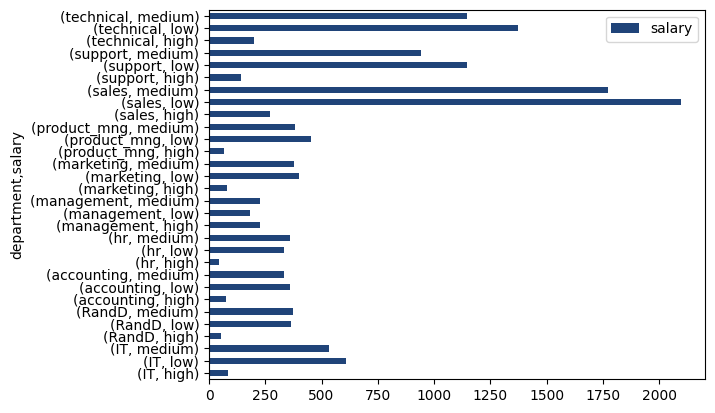

In [27]:
hr_emp.plot(kind='barh', legend=True, alpha=0.9, colormap = 'Blues_r')

**Проверяем гипотезу, что сотрудники с высоким окладо проводят на работе больше времени, чем сотрудники с низким окладом**

In [9]:
hr_high = list(hr.loc[hr["salary"] == "high"]["average_montly_hours"])


hr_low = list(hr.loc[hr["salary"] == "low"]["average_montly_hours"])

In [12]:
t, p = stats.ttest_ind(hr_high, hr_low)
print(t, p)

-0.7288680398062308 0.4661023478267259


**Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**

Среди уволившихся сотрудников:

● Доля сотрудников с повышением за последние 5 лет

In [32]:
to_quit = hr.loc[hr["left"] == 0]

In [33]:
len(to_quit.loc[to_quit["promotion_last_5years"] == 1])/len(to_quit)

0.026251312565628283

● Средняя степень удовлетворенности

In [34]:
to_quit["satisfaction_level"].mean()

0.666809590479524

● Среднее количество проектов

In [35]:
to_quit["number_project"].mean()

3.786664333216661

Среди оставшихся сотрудников:
    
● Доля сотрудников с повышением за последние 5 лет    

In [36]:
left = hr.loc[hr["left"] == 1]

In [37]:
len(left.loc[left["promotion_last_5years"] == 1])/len(left)

0.005320638476617194

● Средняя степень удовлетворенности

In [38]:
left["satisfaction_level"].mean()

0.4400980117614114

● Среднее количество проектов

In [39]:
left["number_project"].mean()

3.8555026603192384

**Разделяем данные на тестовую и обучающую выборки. Строим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
Оцениваем качество модели на тестовой выборке**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(hr[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]],
                                                     pd.array(hr['left']), test_size = 0.2)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

In [21]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [19]:
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [22]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
result = pd.DataFrame([y_test, model.predict(X_test)]).T #сравниваем фактические данные и прогнозируемые
result.head(30)

,0,1
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,0,1
8,0,0
9,0,1


Видим что из 20-ти значений есть три не совпадения факта и прогноза, значит есть другие показатели, которые влияют на увольнение сотрудников не учтенные в опросе. 